In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [5]:
DIRECTORY=r'D:\jupyter\pathole'
CATEGORIES=['normal','pothole']

In [6]:
IMG_SIZE=100;
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])
        print(img_path)
        break

D:\jupyter\pathole\normal\1.jpg
D:\jupyter\pathole\pothole\1.jpg


In [14]:
len(data)

100

In [15]:
random.shuffle(data)

In [16]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [17]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [18]:
X.shape

(100, 100, 100, 3)

In [19]:
pickle.dump(data,open("dataset",'wb'))

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [44]:
name="pothole classification"
tensorboard= TensorBoard(log_dir='logs/{}'.format(name))

In [45]:
model=Sequential()
model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(2,activation='softmax'))

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(X,Y,epochs=5,validation_split=0.1,callbacks=[tensorboard])

Epoch 1/5
3/3 [==============================] - 2s 579ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 1.3123 - val_accuracy: 0.8000
Epoch 2/5
3/3 [==============================] - 1s 316ms/step - loss: 0.0312 - accuracy: 0.9889 - val_loss: 1.4483 - val_accuracy: 0.8000
Epoch 3/5
3/3 [==============================] - 1s 311ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.3371 - val_accuracy: 0.7000
Epoch 4/5
3/3 [==============================] - 1s 316ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.4403 - val_accuracy: 0.7000
Epoch 5/5
3/3 [==============================] - 1s 309ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.8373 - val_accuracy: 0.8000


In [29]:
#for normal road < 0.5
model.evaluate(X,Y)[0]

4/4 [==============================] - 0s 67ms/step - loss: 0.1718 - accuracy: 0.9600


0.1717715710401535

In [15]:
#for pothole roads value > 0.5
model.evaluate(X,Y)[1]

4/4 [==============================] - 0s 33ms/step - loss: 0.6541 - accuracy: 0.5100


0.5099999904632568

In [18]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [21]:
predict_data=data[10]
x=predict_data[0]/255
x

array([[[0.61960784, 0.41568627, 0.27058824],
        [0.61960784, 0.41568627, 0.27058824],
        [0.63137255, 0.41568627, 0.27058824],
        ...,
        [0.75294118, 0.54901961, 0.34117647],
        [0.76078431, 0.54509804, 0.34509804],
        [0.76078431, 0.54509804, 0.34509804]],

       [[0.63137255, 0.42745098, 0.28235294],
        [0.63921569, 0.43529412, 0.29019608],
        [0.65882353, 0.44313725, 0.29803922],
        ...,
        [0.75686275, 0.58431373, 0.42352941],
        [0.78823529, 0.58823529, 0.40784314],
        [0.76470588, 0.56470588, 0.38431373]],

       [[0.64705882, 0.44313725, 0.29803922],
        [0.65490196, 0.45098039, 0.30588235],
        [0.64705882, 0.43137255, 0.28627451],
        ...,
        [0.78039216, 0.59215686, 0.40392157],
        [0.75686275, 0.56862745, 0.40392157],
        [0.76470588, 0.57254902, 0.40784314]],

       ...,

       [[0.0745098 , 0.51764706, 0.34509804],
        [0.20784314, 0.61568627, 0.4745098 ],
        [0.04313725, 0

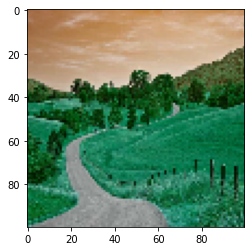

In [22]:
plt.imshow(x)

In [23]:
predictions=model.predict(np.array([x]))
predictions

array([[0.42924845, 0.57075155]], dtype=float32)

In [24]:
if(predictions[0][0]==1):
    print("The road is normal")

if(predictions[0][1]==1):
    print("The road has potholes")

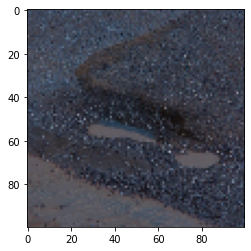

In [25]:
predict_data=data[99]
x=predict_data[0]

plt.imshow(x)

In [26]:
predictions=model.predict(np.array([x]))
predictions

array([[9.364813e-34, 1.000000e+00]], dtype=float32)

In [27]:
if(predictions[0][0]==1):
    print("The road is normal")

if(predictions[0][1]==1):
    print("The road has potholes")

The road has potholes


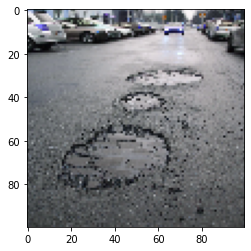

In [33]:
img= r'D:\jupyter\pathole\potholes\327.jpg'
img=cv2.imread(img)
img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(img)

In [34]:
predictions=model.predict(np.array([img]))
predictions

array([[0., 1.]], dtype=float32)

In [35]:
if(predictions[0][0]==1):
    print("The road is normal")

if(predictions[0][1]==1):
    print("The road has potholes")

The road has potholes


In [37]:
from tensorflow import keras

In [40]:
keras.models.load_model("D:/jupyter/my_model")